In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

import gco

PLOT_SIZE = 6
DIR_IMAGES = "images"

In [3]:

def draw_unary(axarr, unary):
    for i in range(unary.shape[-1]):
        axarr[i].set_title("unary term #%i" % i)
        bm = axarr[i].imshow(unary[:, :, i], cmap="gray", interpolation="nearest")
        plt.colorbar(bm, ax=axarr[i])
        # plt.contour(annot, colors='r')


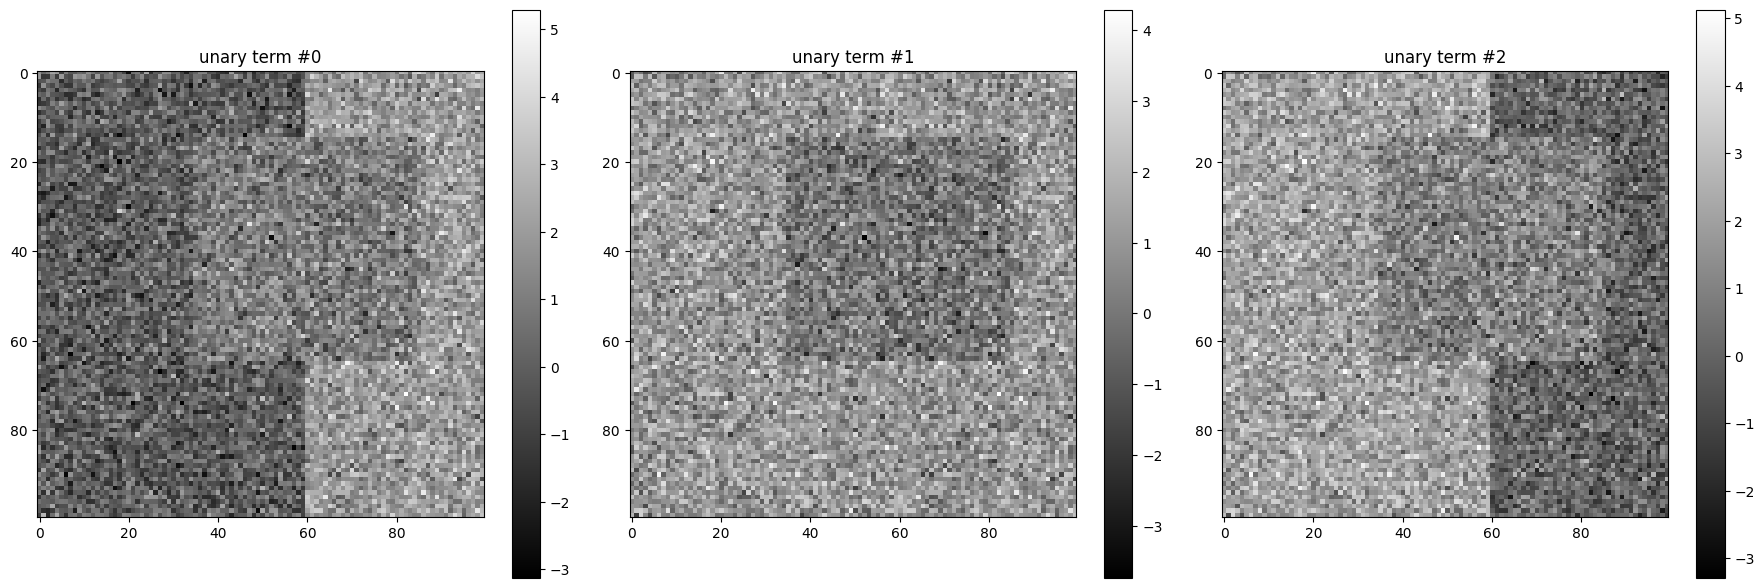

In [4]:

def test_grid():
    """ """
    annot = np.zeros((100, 100))
    annot[:, 60:] = 2
    annot[15:65, 35:85] = 1

    np.random.seed(0)
    noise = annot + np.random.randn(*annot.shape)

    unary = np.tile(noise[:, :, np.newaxis], [1, 1, 3])

    tmp = unary[:, :, 1] - 1
    tmp[annot == 0] *= -1
    unary[:, :, 1] = tmp
    unary[:, :, 2] = 2 - unary[:, :, 2]

    fig, axarr = plt.subplots(ncols=unary.shape[-1], figsize=(unary.shape[-1] * PLOT_SIZE, PLOT_SIZE))
    draw_unary(axarr, unary)
    fig.tight_layout()
    fig.savefig(os.path.join(DIR_IMAGES, "grid_unary.png"))

    pairwise = (1 - np.eye(3)) * 10
    labels = gco.cut_grid_graph_simple(unary, pairwise, n_iter=-1)

    fig, axarr = plt.subplots(ncols=2, figsize=(2 * PLOT_SIZE, PLOT_SIZE))
    axarr[0].set_title("original annotation")
    axarr[0].imshow(annot, interpolation="nearest")
    axarr[1].set_title("resulting labeling")
    axarr[1].imshow(labels.reshape(*annot.shape), interpolation="nearest")
    axarr[1].contour(annot, colors="w")
    fig.tight_layout()
    fig.savefig(os.path.join(DIR_IMAGES, "grid_labels.png")), plt.close()

test_grid()

In [5]:

def test_binary():
    """ """
    annot = np.zeros((100, 100))
    annot[20:70, 30:80] = 1
    np.random.seed(0)
    img = np.random.randn(*annot.shape)
    img += 2 * annot - 1

    # !!! Be careful when doing this concatenation,
    # it seems 'c_' does not create a copy
    # u = np.c_[img.flatten().copy(), - img.flatten().copy()]

    unary = np.tile(img[:, :, np.newaxis], [1, 1, 2])
    unary[:, :, 0] = img
    unary[:, :, 1] = -img
    unary += 4

    fig, axarr = plt.subplots(ncols=unary.shape[-1], figsize=(unary.shape[-1] * PLOT_SIZE, PLOT_SIZE))
    draw_unary(axarr, unary)
    fig.tight_layout()
    fig.savefig(os.path.join(DIR_IMAGES, "binary_unary.png"))

    # edges, edge_weights = get_uniform_smoothness_pw_single_image(img.shape)
    smooth = 1 - np.eye(2)

    # y = pygco.cut_grid_graph_simple(unary, pw_cost*0, n_iter=-1)
    # labels = pygco.cut_grid_graph_simple(unary_new + np.random.
    #   randn(unary.shape[0], unary.shape[1], unary.shape[2])*0,
    #   pw_cost*0, n_iter=-1)
    gco.cut_grid_graph()
    labels = gco.cut_grid_graph_simple(unary, smooth, n_iter=-1)
    labels_0 = gco.cut_grid_graph_simple(unary, smooth * 0.0, n_iter=-1)

    fig, axarr = plt.subplots(ncols=3, figsize=(3 * PLOT_SIZE, PLOT_SIZE))
    axarr[0].set_title("image")
    axarr[0].imshow(img, cmap="gray", interpolation="nearest")
    axarr[0].contour(annot, colors="r")
    axarr[1].set_title("labeling (smooth=1)")
    axarr[1].imshow(labels.reshape(*annot.shape), interpolation="nearest")
    axarr[1].contour(annot, colors="w")
    axarr[2].set_title("labeling (smooth=0)")
    axarr[2].imshow(labels_0.reshape(*annot.shape), interpolation="nearest")
    axarr[2].contour(annot, colors="w")
    fig.tight_layout()
    fig.savefig(os.path.join(DIR_IMAGES, "binary_labels-4conn.png")), plt.close()

    labels = gco.cut_grid_graph_simple(unary, smooth, connect=8, n_iter=-1)
    labels_0 = gco.cut_grid_graph_simple(unary, smooth * 0.0, connect=8, n_iter=-1)

    fig, axarr = plt.subplots(ncols=3, figsize=(3 * PLOT_SIZE, PLOT_SIZE))
    axarr[0].set_title("image")
    axarr[0].imshow(img, cmap="gray", interpolation="nearest")
    axarr[0].contour(annot, colors="r")
    axarr[1].set_title("labeling (smooth=1)")
    axarr[1].imshow(labels.reshape(*annot.shape), interpolation="nearest")
    axarr[1].contour(annot, colors="w")
    axarr[2].set_title("labeling (smooth=0)")
    axarr[2].imshow(labels_0.reshape(*annot.shape), interpolation="nearest")
    axarr[2].contour(annot, colors="w")
    fig.tight_layout()
    fig.savefig(os.path.join(DIR_IMAGES, "binary_labels-8conn.png")), plt.close()